In [ ]:
run main_keras.py

Using TensorFlow backend.


('Reading english Data:', 63386)
('Reading english Data:', 63386)
Merging the English and Japanes news dataframe...
Drop the null line...
False    63340
True         3
Name: en_article, dtype: int64

main_keras.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_sample['word2vec_en'] = df_pairs_sample['en_article'].apply(doc2vec_en)
main_keras.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_sample['word2vec_jp'] = df_pairs_sample['jp_article'].apply(doc2vec_jp)
main_keras.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde


C value = 2 position: [983, 1229]


main_keras.py:269: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("ma..., inputs=[<tf.Tenso...)`
  model_lstm2 = Model(input=[input_1, input_2], output=main_output)


Epoch 1/50
8000/8000 [==============================] - 95s - loss: 0.6924 - acc: 0.5036    
Epoch 2/50
8000/8000 [==============================] - 82s - loss: 0.6795 - acc: 0.5334    
Epoch 3/50
8000/8000 [==============================] - 81s - loss: 0.6581 - acc: 0.5605    
Epoch 4/50
8000/8000 [==============================] - 81s - loss: 0.6558 - acc: 0.5632    
Epoch 5/50
3072/8000 [==========>...................] - ETA: 48s - loss: 0.6316 - acc: 0.5895

In [6]:
model_lstm2.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
main_input_1 (InputLayer)        (None, 300, 200)      0                                            
____________________________________________________________________________________________________
main_input_2 (InputLayer)        (None, 300, 200)      0                                            
____________________________________________________________________________________________________
lstm_1 (LSTM)                    (None, 50)            50200       main_input_1[0][0]               
____________________________________________________________________________________________________
lstm_2 (LSTM)                    (None, 50)            50200       main_input_2[0][0]               
___________________________________________________________________________________________

In [17]:
model_lstm2.save(filepath="dlmodel/model_lstm2_a")

In [1]:
import keras
filepath="dlmodel/model_lstm2_a"
model_lstm2 = keras.models.load_model(filepath)

Using TensorFlow backend.


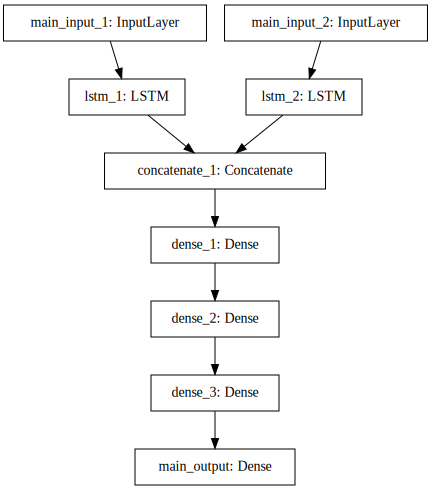

In [2]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model_lstm2).create(prog='dot', format='svg'))

In [3]:
run main_keras.py

('Reading english Data:', 63386)
('Reading english Data:', 63386)
Merging the English and Japanes news dataframe...
Drop the null line...
False    63340
True         3
Name: en_article, dtype: int64

main_keras.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_sample['word2vec_en'] = df_pairs_sample['en_article'].apply(doc2vec_en)
main_keras.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_sample['word2vec_jp'] = df_pairs_sample['jp_article'].apply(doc2vec_jp)
main_keras.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde


C value = 1 position: [1181]


In [5]:
sum(model_lstm2.predict([X1_test, X2_test])>0.5)

array([664])

In [6]:
X1_o.shape

(1000, 300, 200)

In [8]:
	X1_train1, X1_test_1, X1_train2, X1_train3_wrong, X1_test_0 = np.split(X_1, [2000, 3000, 5000, 9000])
	X2_train1, X2_test_1, X2_train2, X2_train3_wrong, X2_test_0 = np.split(X_2, [2000, 3000, 5000, 9000])
	y_train1, y_test, y_train2, y_train3_wrong, Y_o = np.split(y, [2000, 3000, 9000, 9000])

	X1_train = np.concatenate((X1_train1, X1_train2, X1_train3_wrong), axis = 0)
	X2_train = np.concatenate((X2_train1, X2_train2, X2_train3_wrong), axis = 0)
	y_train = np.concatenate((y_train1, y_train2, y_train3_wrong), axis = 0)
	# X_train_correct = np.concatenate((X_train1, X_train2), axis = 0)
	# y_train_correct = np.concatenate((y_train1, y_train2), axis = 0)

	# --- Generate balanced test data --- #
	X1_test = np.concatenate((X1_test_1, X1_test_0), axis=0)
	X2_test = np.concatenate((X2_test_1, X2_test_0), axis=0)

In [10]:
y_test = np.concatenate((np.ones(len(X1_test_1)), np.zeros(len(X1_test_0))), axis = 0)
print(X1_test.shape)
print(X2_test.shape)
print(y_test.shape)

(2000, 300, 200)
(2000, 300, 200)
(2000,)


In [13]:
y_eva_predict = model_lstm2.predict([X1_test, X2_test])

             precision    recall  f1-score   support

        0.0       0.49      0.32      0.39      1000
        1.0       0.49      0.66      0.57      1000

avg / total       0.49      0.49      0.48      2000



In [12]:
print(classification_report(y_test, y_eva_predict>.5))

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

In [1]:
run main_keras.py

Using TensorFlow backend.


('Reading english Data:', 63386)
('Reading english Data:', 63386)
Merging the English and Japanes news dataframe...
Drop the null line...
False    63340
True         3
Name: en_article, dtype: int64


main_keras.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_sample['word2vec_en'] = df_pairs_sample['en_article'].apply(doc2vec_en)
main_keras.py:208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_sample['word2vec_jp'] = df_pairs_sample['jp_article'].apply(doc2vec_jp)
main_keras.py:212: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

C value = 1 position: [4868]


main_keras.py:273: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("ma..., inputs=[<tf.Tenso...)`
  model_lstm2 = Model(input=[input_1, input_2], output=main_output)


Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 82s - loss: 0.6932 - acc: 0.4914 - val_loss: 0.7058 - val_acc: 0.4525
Epoch 2/50
8000/8000 [==============================] - 75s - loss: 0.6889 - acc: 0.5187 - val_loss: 0.7461 - val_acc: 0.4505
Epoch 3/50
8000/8000 [==============================] - 74s - loss: 0.6816 - acc: 0.5265 - val_loss: 0.7568 - val_acc: 0.4730
Epoch 4/50
8000/8000 [==============================] - 72s - loss: 0.6633 - acc: 0.5576 - val_loss: 0.8104 - val_acc: 0.4960
Epoch 5/50
8000/8000 [==============================] - 72s - loss: 0.6500 - acc: 0.5737 - val_loss: 0.7767 - val_acc: 0.4920
Epoch 6/50
8000/8000 [==============================] - 74s - loss: 0.6367 - acc: 0.5836 - val_loss: 0.8485 - val_acc: 0.4815
Epoch 7/50
8000/8000 [==============================] - 70s - loss: 0.6311 - acc: 0.5835 - val_loss: 0.8296 - val_acc: 0.4860
Epoch 8/50
8000/8000 [==============================] - 70s - loss: 0.

TypeError: can't pickle module objects

In [8]:
y_eva_predict = model_lstm2.predict([X1_test, X2_test])
print(classification_report(y_test, y_eva_predict>.5))

             precision    recall  f1-score   support

        0.0       0.40      0.28      0.33      1000
        1.0       0.45      0.59      0.51      1000

avg / total       0.43      0.43      0.42      2000



In [48]:
y_eva_predict[:,0]

array([ 0.43005243,  0.52353752,  0.52349687, ...,  0.52324378,
        0.48257449,  0.1201562 ], dtype=float32)

In [7]:
hist.history

{'acc': [0.49137500000000001,
  0.51875000000000004,
  0.52649999999999997,
  0.55762500000000004,
  0.57374999999999998,
  0.58362499999999995,
  0.58350000000000002,
  0.58512500000000001,
  0.58462499999999995,
  0.59412500000000001,
  0.59437499999999999,
  0.59537499999999999,
  0.58225000000000005,
  0.56912499999999999,
  0.58887500000000004,
  0.59799999999999998,
  0.59612500000000002,
  0.59599999999999997,
  0.59999999999999998,
  0.60550000000000004,
  0.60412500000000002,
  0.609375,
  0.59662499999999996,
  0.59199999999999997,
  0.61424999999999996,
  0.61187499999999995,
  0.61650000000000005,
  0.61512500000000003,
  0.61824999999999997,
  0.61862499999999998,
  0.62849999999999995,
  0.61662499999999998,
  0.60850000000000004,
  0.61324999999999996,
  0.60775000000000001,
  0.581125,
  0.59662499999999996,
  0.61537500000000001,
  0.613375,
  0.61087499999999995,
  0.59624999999999995,
  0.59362499999999996,
  0.60899999999999999,
  0.624,
  0.62275000000000003,
  0.6

In [54]:
"""
Find the ranking results with respect to real pairs
Defaulty, projection1 should be JP
Whiile, projection2 should be EN->JP
"""
def find_ranking(projection1, projection2, dlmodel):
	sim_results = []
	rank_results = []

	# Iterate each of the ariticle from projection1 (999) as proj1
	# Calculate the simialrity of proj1 with all ariticles in projection2 (999)
	for i, proj1 in enumerate(projection1):
		print("Find answer for doc.", i)
		proj1_tile = np.tile(proj1, (len(projection2),1,1))
# 		print proj1_tile.shape
# 		print proj1_tile
# 		print proj1.shape
		sim = dlmodel.predict([proj1_tile, projection2])[:,0]
# 		print sim
		rank = pd.Series(sim).rank(ascending = False)[i]
		sim_results.append(sim)
		rank_results.append(rank)
		print rank

	# sim_results contains 999*999 similairty matrix
	return sim_results, rank_results

In [55]:
a = find_ranking(X1_test_1[:,:,:], X2_test_1, model_lstm2)

('Find answer for doc.', 0)
147.0
('Find answer for doc.', 1)
291.0
('Find answer for doc.', 2)
498.0
('Find answer for doc.', 3)
450.0
('Find answer for doc.', 4)
789.5
('Find answer for doc.', 5)
821.0
('Find answer for doc.', 6)
795.0
('Find answer for doc.', 7)
743.0
('Find answer for doc.', 8)
616.0
('Find answer for doc.', 9)
372.5
('Find answer for doc.', 10)


KeyboardInterrupt: 

In [ ]:
# 根本学习就不成功！！！！

In [74]:
X1_train[4001]

array([[ 0.09626271,  0.00656432, -0.20799024, ...,  0.07659759,
        -0.13206814,  0.06503551],
       [ 0.26123866,  0.01382056,  0.00648347, ...,  0.22894549,
        -0.13786219, -0.12912716],
       [ 0.03575521, -0.23474377, -0.02440281, ...,  0.09979937,
        -0.06005824, -0.07902404],
       ..., 
       [ 0.23872878,  0.06416631,  0.07533237, ...,  0.24324439,
        -0.31456584, -0.49234882],
       [ 0.20270877,  0.07590064,  0.03888318, ...,  0.26487142,
         0.10724627, -0.11777702],
       [ 0.09335291,  0.28491914, -0.0272277 , ...,  0.1573166 ,
        -0.08874487,  0.14690572]])

In [84]:
X2_train

array([[[ 0.2035594 , -0.17032957,  0.13630773, ..., -0.15776674,
         -0.05689833,  0.0529804 ],
        [-0.12451203, -0.3213411 , -0.20498073, ...,  0.20521204,
         -0.07325041,  0.27277657],
        [-0.06744123, -0.16009675,  0.17753807, ..., -0.01309109,
          0.04884958,  0.13856369],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]],

       [[ 0.3649289 ,  0.02026587,  0.17083779, ...,  0.07582411,
          0.04643445, -0.05549098],
        [-0.05416851, -0.13047245,  0.0578197 , ..., -0.0097992 ,
         -0.12715523, -0.60661757],
        [-0.2792525 , -0.26107585, -0.02758151, ..., -0.04302026,
         -0.35708189, -0.30353752],
        ..., 
        [ 0.        ,  0.        ,  0.        , ...,

In [83]:
y_train[3999]

1.0

In [69]:
model_en["chinese"]

array([  9.46130753e-02,   9.54257995e-02,   2.01974958e-01,
        -1.88879788e-01,   1.49911344e-01,   7.41543472e-02,
         2.80297130e-01,   2.06199691e-01,   1.05131559e-01,
        -2.28328779e-01,  -1.71689972e-01,  -1.40397131e-01,
         1.43209575e-02,  -1.47004157e-01,   4.54984196e-02,
        -2.13625193e-01,  -9.76795554e-02,   4.28388566e-01,
        -8.19410384e-02,  -8.34822282e-02,  -1.17317043e-01,
         3.29226926e-02,   5.09187579e-02,   7.38451853e-02,
        -3.33025306e-02,  -4.29547042e-01,  -7.40184113e-02,
        -2.97672898e-01,  -1.95241719e-01,  -1.98570509e-02,
         5.34500889e-02,  -1.96851701e-01,   1.98751673e-01,
         1.33167773e-01,   1.65657312e-01,   3.39270979e-02,
         2.12546214e-01,  -6.87375665e-02,   1.09114878e-01,
         2.53317505e-01,   3.50452997e-02,   1.12259544e-01,
        -2.83444434e-01,   2.62120292e-02,   3.69520895e-02,
         1.59424357e-02,  -2.65563745e-02,  -1.95016041e-01,
        -2.47364923e-01,

In [61]:
df_pairs_sample

,Unnamed: 0,en_article,Unnamed: 0,jp_article,similarity,dis_similarity,en_article_wrong,word2vec_en,word2vec_jp,padding_en,padding_jp
0,0,u.s. commerce department seasonal adjust annua...,0,米 商務省 発表 する 建設 支出 以下 とおり 季節調整 年率 総 建設 支出 民間 部門...,5.0,1.0,philippine will offer tender next year airport...,"[[0.079418, -0.0698862, 0.0105229, 0.0433305, ...","[[0.203559, -0.17033, 0.136308, -0.0854052, -0...","[[0.0794180035591, -0.0698861926794, 0.0105229...","[[0.203559398651, -0.17032957077, 0.1363077312..."
1,1,chinese budget smartphone maker xiaomi plan se...,1,中国 低価格 スマホ メーカー 小米科技 () 雷軍 董事長 以上 販売 する 計画 明らか...,5.0,1.0,taiwanese bank have exposure loan company chin...,"[[0.0946131, 0.0954258, 0.201975, -0.18888, 0....","[[0.364929, 0.0202659, 0.170838, 0.0298371, -0...","[[0.0946130752563, 0.095425799489, 0.201974958...","[[0.364928901196, 0.0202658716589, 0.170837789..."
2,2,samsung electronics co ltd fell more percent t...,2,ソウル 株式市場 サムスン電子 株価 超 下落 する 安値 付ける 一部 アナリスト ウォン...,5.0,1.0,bank canada should keep it key interest rate h...,"[[0.111116, 0.163467, 0.173304, -0.21241, 0.19...","[[0.379925, -0.16321, 0.216476, -0.00105682, -...","[[0.111115589738, 0.163467362523, 0.1733036488...","[[0.379924654961, -0.163209781051, 0.216475769..."
3,3,fiat deal gain full control chrysler group llc...,3,欧州 株式市場 イタリア 自動車 大手 FIAT 株価 一時 急伸 する 8月 以来 高値 ...,5.0,1.0,brazil incoming finance minister joaquim levy ...,"[[0.252217, -0.149704, -0.000305933, 0.335273,...","[[0.27545, 0.0250656, 0.0825939, 0.136058, -0....","[[0.252217, -0.149704, -0.000305933, 0.335273,...","[[0.275450408459, 0.0250655952841, 0.082593858..."
4,4,fiat share jump thursday it strike deal gain f...,4,欧州 株式市場 イタリア 自動車 大手 FIAT 株価 一時 急伸 する 8月 以来 高値 ...,5.0,1.0,u.s. employer add large number worker nearly y...,"[[0.252217, -0.149704, -0.000305933, 0.335273,...","[[0.27545, 0.0250656, 0.0825939, 0.136058, -0....","[[0.252217, -0.149704, -0.000305933, 0.335273,...","[[0.275450408459, 0.0250655952841, 0.082593858..."
5,5,u.s. treasuries price rise thursday benchmark ...,5,カッコ 前 営業日 米 東部 時間 時分 前 営業日 終盤 米 東部 時間 時分 前 営業日...,5.0,1.0,india central bank keep it key policy repo rat...,"[[0.079418, -0.0698862, 0.0105229, 0.0433305, ...","[[-0.401097, -0.568938, -0.155227, 0.434545, -...","[[0.079418, -0.0698862, 0.0105229, 0.0433305, ...","[[-0.401097238064, -0.56893825531, -0.15522733..."
6,6,auction detail see 3-year note,6,米財務省 銘柄 統合 入札 実施 する 発表 する 発行 いずれ 償還 1月 11月 11月,5.0,1.0,sweden central bank keep it key interest rate ...,"[[0.145339, 0.0967358, -0.290555, -0.157721, 0...","[[-0.440666, 0.610078, -0.0983196, 0.801558, 0...","[[0.145339399576, 0.0967358276248, -0.29055538...","[[-0.440665841103, 0.610077679157, -0.09831961..."
7,7,brent crude sink barrel thursday libya prepare...,7,原油 先物 相場 リビア 大 規模 油田 生産 停止 要因 なる いる 抗議活動 休止 する...,5.0,1.0,asset manager credit suisse hedging griffo be ...,"[[-0.00470701, -0.396765, -0.322486, -0.53076,...","[[0.00253854, -0.129143, -0.126948, 0.0700992,...","[[-0.00470701, -0.396765, -0.322486, -0.53076,...","[[0.00253854179755, -0.129142984748, -0.126948..."
8,8,gauge u.s. factory activity hold 2-1/2-year hi...,8,米 労働省 発表 する 12月 週 新規 失業保険 申請 件数 季節調整 前週 り 連続 減...,5.0,1.0,* usd/cnh close ny trade 6.1370-6.1450 offshor...,"[[0.258893, -0.240117, -0.39061, -0.180771, 0....","[[0.203559, -0.17033, 0.136308, -0.0854052, -0...","[[0.258893, -0.240117, -0.39061, -0.180771, 0....","[[0.203559398651, -0.17032957077, 0.1363077312..."
9,9,work massive panama canal extension project ma...,9,パナマ運河 拡張 工事 めぐる 建設 会社 成る 企業 連合 パナマ運河 PC コスト 超過...,5.0,1.0,chipmaker altera corp be work intel corp combi...,"[[-0.246409, -0.300402, 0.0540296, 0.0361169, ...","[[0.0367229, 0.154389, -0.430821, 0.336414, -0...","[[-0.246409475803, -0.300402313471, 0.05402963...","[[0.0367229022086, 0.154389277101, -0.43082135..."


In [86]:
hist = model_lstm2.fit([X1_train, X2_train], [y_train], go_backwards=True,
                       validation_data=([X1_test, X2_test], y_test), epochs=50, batch_size=256)

TypeError: Unrecognized keyword arguments: {'go_backwards': True}

In [89]:
	# Input layer
	input_1 = Input(shape=(maxlen,200), dtype='float32', name='main_input_1')
	input_2 = Input(shape=(maxlen,200), dtype='float32', name='main_input_2')

	# LSTM layer
	# lstm_out_1 = LSTM(50)(input_1)
	# lstm_out_1 = LSTM(50)(input_1)
	lstm_out_1 = LSTM(50, go_backwards = True)(input_1)
	lstm_out_2 = LSTM(50, go_backwards = True)(input_2)

	# Merge layer
	merged_vector = keras.layers.concatenate([lstm_out_1, lstm_out_2], axis=-1)

	# (Dense 1) * 3
	x1 = Dense(64, activation='relu')(merged_vector)
	x1 = Dense(64, activation='relu')(x1)
	x1 = Dense(64, activation='relu')(x1)
	main_output = Dense(1, activation='sigmoid', name='main_output')(x1)

	# Model definition
	model_lstm2 = Model(input=[input_1, input_2], output=main_output)

	# Compile the model
	model_lstm2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
	# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


	# Fit the training model
	hist = model_lstm2.fit([X1_train, X2_train], [y_train],
	                       validation_data=([X1_test, X2_test], y_test), epochs=50, batch_size=256)

/home/liuenda/miniconda3/envs/py2k/lib/python2.7/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("ma..., inputs=[<tf.Tenso...)`


Train on 8000 samples, validate on 2000 samples
Epoch 1/50
8000/8000 [==============================] - 45s - loss: 0.6337 - acc: 0.6641 - val_loss: 0.5705 - val_acc: 0.7120
Epoch 2/50
8000/8000 [==============================] - 44s - loss: 0.4121 - acc: 0.8139 - val_loss: 0.4276 - val_acc: 0.8045
Epoch 3/50
8000/8000 [==============================] - 45s - loss: 0.2964 - acc: 0.8811 - val_loss: 0.3740 - val_acc: 0.8475
Epoch 4/50
8000/8000 [==============================] - 45s - loss: 0.2400 - acc: 0.9083 - val_loss: 0.3988 - val_acc: 0.8440
Epoch 5/50
8000/8000 [==============================] - 43s - loss: 0.2042 - acc: 0.9263 - val_loss: 0.4031 - val_acc: 0.8375
Epoch 6/50
8000/8000 [==============================] - 43s - loss: 0.1665 - acc: 0.9404 - val_loss: 0.4219 - val_acc: 0.8495
Epoch 7/50
8000/8000 [==============================] - 43s - loss: 0.1463 - acc: 0.9506 - val_loss: 0.4112 - val_acc: 0.8590
Epoch 8/50
8000/8000 [==============================] - 45s - loss: 0.

KeyboardInterrupt: 

In [91]:
y_eva_predict = model_lstm2.predict([X1_test, X2_test])
print(classification_report(y_test, y_eva_predict>.5))

             precision    recall  f1-score   support

        0.0       0.86      0.87      0.86      1000
        1.0       0.87      0.86      0.86      1000

avg / total       0.86      0.86      0.86      2000



In [92]:
# 1、 考虑是不是过学习的问题
# 2、 考虑在epoch的过程中自动生成文章表示的向量，这样是不是可以更快的计算
# 3、 研究使用cosine similarity来计算最后的方程
a = find_ranking(X1_test_1[:,:,:], X2_test_1, model_lstm2)

('Find answer for doc.', 0)
7.0
('Find answer for doc.', 1)
1.0
('Find answer for doc.', 2)
1.0
('Find answer for doc.', 3)
58.0
('Find answer for doc.', 4)
84.5
('Find answer for doc.', 5)
13.0
('Find answer for doc.', 6)
195.0
('Find answer for doc.', 7)
6.0
('Find answer for doc.', 8)
6.0
('Find answer for doc.', 9)
34.5
('Find answer for doc.', 10)
3.0
('Find answer for doc.', 11)
37.0
('Find answer for doc.', 12)
25.0
('Find answer for doc.', 13)
1.0
('Find answer for doc.', 14)
25.5
('Find answer for doc.', 15)
53.0
('Find answer for doc.', 16)
29.5
('Find answer for doc.', 17)
73.0
('Find answer for doc.', 18)
13.0
('Find answer for doc.', 19)
15.5
('Find answer for doc.', 20)
30.0
('Find answer for doc.', 21)
19.0
('Find answer for doc.', 22)
73.0
('Find answer for doc.', 23)
1.0
('Find answer for doc.', 24)
24.0
('Find answer for doc.', 25)
8.5
('Find answer for doc.', 26)
62.0
('Find answer for doc.', 27)
35.5
('Find answer for doc.', 28)
1.0
('Find answer for doc.', 29)
5.0


('Find answer for doc.', 239)
214.0
('Find answer for doc.', 240)
30.0
('Find answer for doc.', 241)
36.0
('Find answer for doc.', 242)
25.0
('Find answer for doc.', 243)
108.5
('Find answer for doc.', 244)
8.0
('Find answer for doc.', 245)
14.5
('Find answer for doc.', 246)
242.0
('Find answer for doc.', 247)
10.5
('Find answer for doc.', 248)
5.5
('Find answer for doc.', 249)
49.0
('Find answer for doc.', 250)
82.0
('Find answer for doc.', 251)
14.0
('Find answer for doc.', 252)
56.0
('Find answer for doc.', 253)
108.5
('Find answer for doc.', 254)
25.0
('Find answer for doc.', 255)
172.0
('Find answer for doc.', 256)
16.0
('Find answer for doc.', 257)
85.5
('Find answer for doc.', 258)
3.0
('Find answer for doc.', 259)
15.5
('Find answer for doc.', 260)
8.0
('Find answer for doc.', 261)
213.0
('Find answer for doc.', 262)
20.0
('Find answer for doc.', 263)
22.0
('Find answer for doc.', 264)
10.5
('Find answer for doc.', 265)
242.0
('Find answer for doc.', 266)
159.0
('Find answer fo

('Find answer for doc.', 474)
22.0
('Find answer for doc.', 475)
55.0
('Find answer for doc.', 476)
7.0
('Find answer for doc.', 477)
12.0
('Find answer for doc.', 478)
92.0
('Find answer for doc.', 479)
1.0
('Find answer for doc.', 480)
12.0
('Find answer for doc.', 481)
104.5
('Find answer for doc.', 482)
12.0
('Find answer for doc.', 483)
18.0
('Find answer for doc.', 484)
3.0
('Find answer for doc.', 485)
23.5
('Find answer for doc.', 486)
11.0
('Find answer for doc.', 487)
46.0
('Find answer for doc.', 488)
5.5
('Find answer for doc.', 489)
32.0
('Find answer for doc.', 490)
8.0
('Find answer for doc.', 491)
156.5
('Find answer for doc.', 492)
14.0
('Find answer for doc.', 493)
70.5
('Find answer for doc.', 494)
10.5
('Find answer for doc.', 495)
37.0
('Find answer for doc.', 496)
5.5
('Find answer for doc.', 497)
25.5
('Find answer for doc.', 498)
4.0
('Find answer for doc.', 499)
7.0
('Find answer for doc.', 500)
49.5
('Find answer for doc.', 501)
8.5
('Find answer for doc.', 50

24.0
('Find answer for doc.', 944)
3.0
('Find answer for doc.', 945)
27.0
('Find answer for doc.', 946)
30.0
('Find answer for doc.', 947)
10.0
('Find answer for doc.', 948)
60.5
('Find answer for doc.', 949)
15.0
('Find answer for doc.', 950)
74.0
('Find answer for doc.', 951)
103.0
('Find answer for doc.', 952)
23.5
('Find answer for doc.', 953)
34.0
('Find answer for doc.', 954)
49.5
('Find answer for doc.', 955)
6.0
('Find answer for doc.', 956)
9.5
('Find answer for doc.', 957)
60.5
('Find answer for doc.', 958)
206.5
('Find answer for doc.', 959)
54.5
('Find answer for doc.', 960)
22.0
('Find answer for doc.', 961)
71.0
('Find answer for doc.', 962)
21.5
('Find answer for doc.', 963)
41.5
('Find answer for doc.', 964)
28.0
('Find answer for doc.', 965)
7.0
('Find answer for doc.', 966)
5.0
('Find answer for doc.', 967)
98.5
('Find answer for doc.', 968)
2.0
('Find answer for doc.', 969)
47.0
('Find answer for doc.', 970)
4.0
('Find answer for doc.', 971)
109.0
('Find answer for d

In [93]:
sim_results_test, rank_results_test = a

In [94]:
 print(pd.Series(rank_results_test).describe())

count    1000.000000
mean       49.668000
std        70.423094
min         1.000000
25%         9.000000
50%        23.000000
75%        58.000000
max       514.500000
dtype: float64


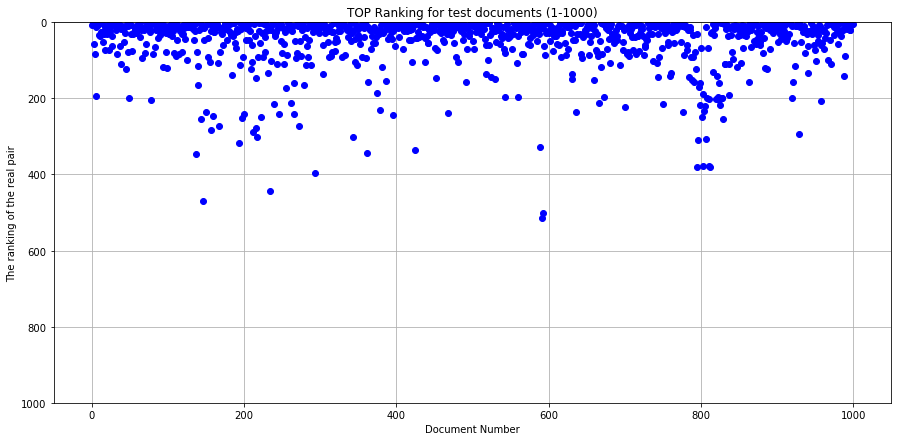

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['figure.figsize'] = (6.0, 2.0)
matplotlib.rcParams['figure.figsize'] = (15, 7)
plt.plot(rank_results_test,'bo')
plt.title('TOP Ranking for test documents (1-1000)')
plt.xlabel('Document Number')
plt.ylabel('The ranking of the real pair')
plt.ylim([1000,0])
plt.grid(True)
plt.savefig('top-test.eps', format='eps', dpi=1000)
plt.show()

In [107]:
print sum(np.array(rank_results_test) <= 10)
print sum(np.array(rank_results_test) <= 5)
print sum(np.array(rank_results_test) <= 1)

271
150
23


In [ ]:
# 目前的结果基本上到达了google翻译成通种语言以后的水平！非常精彩，在top1的范围还有一倍的差距，但是在top10的范围内已经非常接近真是水平了

In [106]:
np.array(rank_results_test)

array([   7. ,    1. ,    1. ,   58. ,   84.5,   13. ,  195. ,    6. ,
          6. ,   34.5,    3. ,   37. ,   25. ,    1. ,   25.5,   53. ,
         29.5,   73. ,   13. ,   15.5,   30. ,   19. ,   73. ,    1. ,
         24. ,    8.5,   62. ,   35.5,    1. ,    5. ,    5. ,    6. ,
         19. ,   82.5,    6. ,    7. ,    3.5,   62. ,   18. ,  110. ,
         10. ,   18.5,   51. ,   14. ,   29. ,  123. ,    4. ,    9. ,
         77. ,  199. ,    6. ,    8. ,   32. ,   76. ,   29.5,   28. ,
         26. ,   18. ,   29. ,    7. ,   17. ,   16. ,   14. ,    2. ,
         38. ,   20. ,   93. ,   16. ,   15. ,   21. ,   80. ,   58. ,
          7.5,    2. ,    8. ,    7.5,   18. ,   24.5,  205. ,    1. ,
         82.5,    2.5,    5.5,   65. ,   19. ,    2. ,   13.5,   41. ,
         21.5,   34.5,    3. ,    1. ,    8. ,  117. ,    5. ,   26. ,
         19. ,   79. ,   28. ,  119. ,    8.5,   30. ,   23. ,   30. ,
          7.5,   37. ,    2.5,   22.5,   82. ,   15.5,    2. ,   88.5,
      

In [1]:
run main_keras.py

Using TensorFlow backend.


('Reading english Data:', 63386)
('Reading english Data:', 63386)
Merging the English and Japanes news dataframe...
Drop the null line...
False    63340
True         3
Name: en_article, dtype: int64


main_keras.py:206: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_sample['word2vec_en'] = df_pairs_sample['en_article'].apply(doc2vec_en)
main_keras.py:207: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_pairs_sample['word2vec_jp'] = df_pairs_sample['jp_article'].apply(doc2vec_jp)
main_keras.py:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/inde

C value = 1 position: [2580]


MemoryError: 

In [18]:
	X1_test = np.concatenate((X1_test_1, X1_test_0), axis=0)
	X2_test = np.concatenate((X2_test_1, X2_test_0), axis=0)
	y_test = np.concatenate((np.ones(len(X1_test_1)), np.zeros(len(X1_test_0))), axis = 0)

In [25]:
model1 = keras.models.load_model("model_lstm2_b")

In [23]:
y_pred_training = model1.predict([X1_train, X2_train])

In [24]:
print(classification_report(y_train, y_pred_training>.5))

             precision    recall  f1-score   support

        0.0       0.69      0.45      0.54      4000
        1.0       0.59      0.80      0.68      4000

avg / total       0.64      0.62      0.61      8000



In [26]:
y_pred_training = model1.predict([X1_test, X2_test])

In [27]:
print(classification_report(y_test, y_pred_training>.5))

             precision    recall  f1-score   support

        0.0       0.47      0.36      0.41      1000
        1.0       0.48      0.59      0.53      1000

avg / total       0.47      0.47      0.47      2000



In [28]:
	# Input layer
	input_1 = Input(shape=(maxlen,200), dtype='float32', name='main_input_1')
	input_2 = Input(shape=(maxlen,200), dtype='float32', name='main_input_2')

	# LSTM layer
	# lstm_out_1 = LSTM(50)(input_1)
	# lstm_out_2 = LSTM(50)(input_2)
	lstm_out_1 = LSTM(50, go_backwards = True)(input_1)
	lstm_out_2 = LSTM(50, go_backwards = True)(input_2)

	# Merge layer
	merged_vector = keras.layers.concatenate([lstm_out_1, lstm_out_2], axis=-1)

	# (Dense 1) * 3
	x1 = Dense(64, activation='relu')(merged_vector)
	x1 = Dense(64, activation='relu')(x1)
	x1 = Dense(64, activation='relu')(x1)
	main_output = Dense(1, activation='sigmoid', name='main_output')(x1)

	# Model definition
	model_lstm2 = Model(input=[input_1, input_2], output=main_output)

	# Compile the model
	model_lstm2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
	# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


	# Fit the training model
	hist = model_lstm2.fit([X1_train, X2_train], [y_train],
	                       validation_data=([X1_test, X2_test], y_test), epochs=10, batch_size=256)

/home/liuenda/miniconda3/envs/py2k/lib/python2.7/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("ma..., inputs=[<tf.Tenso...)`


Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 259s - loss: 0.6565 - acc: 0.6345 - val_loss: 0.6320 - val_acc: 0.6430
Epoch 2/10
8000/8000 [==============================] - 302s - loss: 0.4402 - acc: 0.8023 - val_loss: 0.4839 - val_acc: 0.7650
Epoch 3/10
1280/8000 [===>..........................] - ETA: 150s - loss: 0.3563 - acc: 0.8492

KeyboardInterrupt: 

In [30]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from keras.preprocessing import sequence
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

In [3]:
import numpy as np
r = np.array([   7. ,    1. ,    1. ,   58. ,   84.5,   13. ,  195. ,    6. ,
          6. ,   34.5,    3. ,   37. ,   25. ,    1. ,   25.5,   53. ,
         29.5,   73. ,   13. ,   15.5,   30. ,   19. ,   73. ,    1. ,
         24. ,    8.5,   62. ,   35.5,    1. ,    5. ,    5. ,    6. ,
         19. ,   82.5,    6. ,    7. ,    3.5,   62. ,   18. ,  110. ,
         10. ,   18.5,   51. ,   14. ,   29. ,  123. ,    4. ,    9. ,
         77. ,  199. ,    6. ,    8. ,   32. ,   76. ,   29.5,   28. ,
         26. ,   18. ,   29. ,    7. ,   17. ,   16. ,   14. ,    2. ,
         38. ,   20. ,   93. ,   16. ,   15. ,   21. ,   80. ,   58. ,
          7.5,    2. ,    8. ,    7.5,   18. ,   24.5,  205. ,    1. ,
         82.5,    2.5,    5.5,   65. ,   19. ,    2. ,   13.5,   41. ,
         21.5,   34.5,    3. ,    1. ,    8. ,  117. ,    5. ,   26. ,
         19. ,   79. ,   28. ,  119. ,    8.5,   30. ,   23. ,   30. ,
          7.5,   37. ,    2.5,   22.5,   82. ,   15.5,    2. ,   88.5,
         46. ,   16. ,   13. ,   82.5,   24. ,   11. ,   78. ,   32. ,
         29.5,   15.5,   44. ,    2. ,   12. ,   98. ,   12. ,    7.5,
          6.5,   13. ,    2. ,    3. ,   12. ,   18. ,   47. ,    4. ,
         24. ,  347. ,   77. ,  115. ,  165. ,   21.5,    2. ,   14. ,
        254. ,    8. ,  469. ,   46.5,   14. ,    9. ,  236.5,    4.5,
         42. ,   91.5,    1.5,  104.5,   23. ,  283. ,    9.5,  246. ,
         25.5,   25. ,    2. ,    6. ,    4. ,   13. ,  106. ,  273.5,
         77.5,   14.5,   25. ,   32. ,   58.5,   10. ,   17. ,    3. ,
         17. ,    7. ,   47.5,   20. ,    1.5,   25. ,    5. ,   33. ,
        139. ,    3. ,   35. ,    2. ,   54. ,   67.5,   25.5,   17. ,
         23. ,  317. ,  111. ,    3. ,   18.5,  251. ,   91.5,   12.5,
        242. ,    6. ,   46. ,   14.5,   14. ,   16.5,    5. ,   47. ,
         24. ,  123. ,  104.5,   59. ,  289. ,    4. ,   37. ,  146. ,
        279. ,  301.5,   91.5,   22. ,    1. ,   54. ,  249. ,   29. ,
          3. ,   91.5,    4. ,   39. ,   79. ,   23. ,    8. ,  134. ,
         21. ,   17. ,  444. ,   20. ,  101.5,    7.5,    3. ,  214. ,
         30. ,   36. ,   25. ,  108.5,    8. ,   14.5,  242. ,   10.5,
          5.5,   49. ,   82. ,   14. ,   56. ,  108.5,   25. ,  172. ,
         16. ,   85.5,    3. ,   15.5,    8. ,  213. ,   20. ,   22. ,
         10.5,  242. ,  159. ,   49.5,   94. ,    5. ,   81. ,    9. ,
        273.5,    2. ,   49.5,   89. ,   20.5,    2. ,   10.5,  165. ,
         38. ,  111. ,   62.5,   14.5,   91.5,   46.5,    7.5,    3. ,
        111. ,   12. ,    1. ,   25.5,    7. ,  397. ,   16. ,   14. ,
          1. ,    4.5,    3. ,   28.5,   14. ,    7.5,   11. ,  137. ,
         60. ,    5.5,   29. ,   20. ,   12. ,   23. ,   53. ,   23.5,
         91.5,    9. ,   88. ,   25. ,   77. ,   25. ,    2. ,   51. ,
         75. ,   40. ,   48. ,   23.5,   11. ,    5.5,   23. ,    9. ,
          3.5,   91.5,    5. ,    5.5,   87. ,   10.5,   15. ,   20. ,
         12.5,   39. ,   14. ,   22. ,    1. ,   50.5,   28.5,  301.5,
         21.5,  105.5,   43. ,    7. ,  111. ,   17. ,   33. ,   41. ,
         56.5,    7. ,   12. ,   92. ,    5. ,   39. ,   16. ,    1.5,
         93. ,  342.5,    8.5,  156. ,   14. ,   21.5,   19. ,   70. ,
         35.5,   55.5,   19. ,   12. ,   55. ,   37.5,  185. ,   20. ,
         27. ,   31. ,   21.5,  231. ,    6. ,  118. ,    2. ,   28. ,
          1. ,   21. ,  155.5,    7. ,   12. ,   44. ,    9. ,   35. ,
          7. ,   23. ,   43.5,   24. ,  242.5,    2. ,   63. ,   12. ,
          3. ,    7. ,   16. ,   37.5,    5.5,    4.5,   13. ,   10.5,
         17.5,   70.5,   24. ,   20. ,   15.5,    2. ,   23. ,   21.5,
          6. ,   45.5,   20. ,   45.5,   17.5,  105. ,    4. ,    8. ,
        335.5,    5. ,   41. ,   40.5,   24.5,   35.5,   39.5,   11. ,
          2. ,    4.5,   37. ,   12. ,    9. ,  104. ,   41.5,   13. ,
         35. ,   55. ,   54.5,   19. ,   26. ,   19.5,    8.5,    5. ,
         17. ,   10. ,   19. ,   67. ,  147. ,   72.5,    8. ,    2. ,
         23. ,    1.5,   28. ,   17. ,    7. ,   46. ,   52. ,   24. ,
          3. ,   19.5,   12. ,   32. ,  238.5,    8.5,   18. ,   32. ,
         34. ,    2. ,   22. ,   55. ,    7. ,   12. ,   92. ,    1. ,
         12. ,  104.5,   12. ,   18. ,    3. ,   23.5,   11. ,   46. ,
          5.5,   32. ,    8. ,  156.5,   14. ,   70.5,   10.5,   37. ,
          5.5,   25.5,    4. ,    7. ,   49.5,    8.5,   69. ,    1. ,
         13. ,   26. ,    2. ,    1. ,    6.5,   13. ,   14. ,   30. ,
         18. ,    5.5,    8. ,   17.5,   43.5,   60. ,  136. ,    2. ,
         99. ,    2. ,   59.5,   32.5,  144. ,   25. ,   14. ,   16. ,
         19. ,  150. ,   23.5,   52. ,    2. ,   21. ,    6. ,    7. ,
         56.5,   35. ,   41.5,   31. ,   13. ,   69.5,  196.5,   81. ,
         35. ,    5. ,   42. ,   21.5,   37.5,   36. ,   30. ,   18. ,
         70. ,   31.5,    1.5,    1. ,    1.5,   15. ,  108. ,  196.5,
         36. ,   10. ,    1.5,    9. ,   24.5,   83. ,   83. ,    9. ,
         16. ,    8. ,   25.5,    9. ,    4. ,   58. ,   17.5,   59. ,
         40.5,    9. ,   23. ,   34. ,    5. ,   19. ,   28. ,    2. ,
         49. ,    1.5,   17. ,   32. ,  327. ,   17. ,    4. ,  514.5,
         16. ,  502.5,   61.5,   85. ,    3. ,   28.5,    2. ,   23.5,
         28.5,   50. ,    6. ,   19. ,   19. ,   75.5,   14. ,   37. ,
         29. ,   37. ,   18. ,   57. ,   12. ,   28.5,   60.5,    3. ,
         91. ,   27.5,   23. ,    2. ,    6. ,   55. ,   85. ,    4. ,
         12. ,   70. ,    1.5,   13.5,    8.5,   27. ,  137. ,  148. ,
         45.5,    5.5,   11. ,   47. ,  235. ,   30.5,    1. ,    2. ,
          3. ,   32. ,    1. ,   84.5,   93. ,   39.5,   30. ,   21.5,
         27. ,   29.5,   12. ,    5.5,   15. ,   85.5,   52. ,    9.5,
         35. ,   14. ,    3. ,    7. ,  153. ,   22. ,   73. ,   77.5,
         32. ,   88. ,  211.5,   50.5,  117. ,    1. ,   84. ,    4. ,
          1. ,  197. ,    2. ,   14. ,   11. ,   69.5,   21.5,   44. ,
         13.5,  106. ,    5. ,   31. ,   34. ,   41. ,   54.5,   36.5,
         21.5,   46. ,   35. ,   11. ,    7. ,   10.5,  111.5,    9.5,
          9. ,   72. ,   52.5,   20. ,  223.5,   15. ,   15. ,   83.5,
         77.5,    6. ,   88. ,   27. ,   16.5,   37.5,   73. ,   11. ,
          1.5,   39.5,   83.5,    8. ,   36. ,   37. ,    5. ,   76.5,
         28.5,   17. ,   17. ,   11. ,   35. ,   85.5,   65.5,   59. ,
         44. ,   47. ,    3. ,   30. ,   15.5,    6.5,    8. ,   32. ,
         10. ,  103. ,    9. ,   12.5,    5. ,    8. ,  107.5,  143.5,
         29.5,   92.5,    2. ,   11.5,   15.5,   67. ,  213.5,   19. ,
          2. ,   28.5,   13.5,    4. ,   60.5,   51. ,   20. ,  140.5,
         12.5,  133.5,   25. ,   23.5,    2. ,   54. ,    4. ,   21.5,
         16. ,    9.5,    2. ,    1. ,    7. ,    8. ,   51. ,   11. ,
        235. ,   85.5,    4. ,   13.5,    9.5,   73.5,   59. ,   19. ,
        145. ,   19. ,   12. ,   92. ,  152.5,   33.5,   91. ,  156.5,
         77.5,  123. ,   30. ,  379.5,  308.5,  171. ,  160. ,  216.5,
         67.5,  248.5,  189.5,  377.5,  233.5,  219.5,  306.5,   13. ,
        199. ,   67.5,  201.5,  377.5,  379.5,   27. ,   25. ,    4. ,
        129.5,   34. ,   16. ,    4. ,  200.5,  140.5,  197.5,  160. ,
        205. ,  218.5,    3. ,  199. ,  200. ,  254.5,    5. ,  109. ,
        110. ,   18.5,    7. ,   36.5,  109. ,  192. ,   15.5,   34. ,
         79. ,    8.5,   96. ,   18.5,    8. ,    9.5,   16. ,  116.5,
         10.5,   35. ,   20.5,   34. ,  108. ,   10. ,    7. ,   68. ,
         33.5,   22. ,   10.5,   37. ,   18.5,   22. ,   24. ,  156. ,
          2. ,   66. ,   21. ,    9. ,    7. ,   48.5,    3. ,    3. ,
         58. ,   43. ,   25. ,   10. ,   33.5,   52. ,   61. ,   26. ,
          4. ,   81. ,   41.5,    9. ,  119. ,   16. ,    6. ,  121.5,
          1. ,    2. ,   71.5,   19.5,   13. ,   12. ,    2. ,   27. ,
         21. ,   21.5,   20.5,    9. ,    3.5,   51.5,    1. ,   31.5,
         13. ,   43. ,    5. ,   23.5,   29. ,   22.5,    7. ,   50. ,
         38.5,   41. ,    2. ,    3. ,   30. ,    2. ,    4.5,    8.5,
        199.5,  157. ,   53.5,  115.5,   11. ,    9.5,    6. ,    2. ,
        293. ,    2. ,   12. ,   51.5,   11.5,   12. ,   25. ,   10.5,
         19. ,   80. ,   22. ,   31. ,   63. ,  134.5,   24. ,   24. ,
          3. ,   27. ,   30. ,   10. ,   60.5,   15. ,   74. ,  103. ,
         23.5,   34. ,   49.5,    6. ,    9.5,   60.5,  206.5,   54.5,
         22. ,   71. ,   21.5,   41.5,   28. ,    7. ,    5. ,   98.5,
          2. ,   47. ,    4. ,  109. ,    4. ,    2. ,   13. ,   34. ,
         11.5,   12. ,    2. ,   19. ,   57. ,   20. ,    3. ,   27. ,
         37. ,   21. ,   20.5,    5.5,  140. ,   89. ,    5.5,    8. ,
         17. ,    3. ,    1.5,   20.5,   21. ,    7.5,    4.5,    4. ])

In [8]:
import pandas as pd
pd.Series(r).describe()

count    1000.000000
mean       49.668000
std        70.423094
min         1.000000
25%         9.000000
50%        23.000000
75%        58.000000
max       514.500000
dtype: float64